# Project: Analysis of "The movie database"

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>

<a id='intro'></a>
## Introduction

### Dataset Description
This data set contains information about 10,000 movies extracted from [TMDB](https://www.themoviedb.org/). The dataset contains movies from 1960 to 2015. Including user ratings and revenue. Original data from [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata)

### Columns Descreption:
- `id, imdb_id`: unique id or imdb id for each movie on TMDB
- `popularity`: a metric used to measure the popularity of the movie.
- `budget`:the total budget of the moviein USD.
- `revenue`:the total revenue of the movie in USD.
- `original_title`: the original title of the movie.
- `cast`:the names of the cast of the movie separated by "|".
- `homepage`: the website of the movie (if it existed).
- `director`:name(s) of the director(s) of the movie (separated by "|" if there are more than one director).
- `tagline`:a catchphrase describing the movie.
- `keywords`: keywords related to the movie.
- `overview`:summary of the plot of the movie.
- `runtime`:total runtime of the movie in minutes.
- `genres`: genres of the movie separated by "|".
- `production_companies`:production compan(y/ies) of the movie.
- `release_date`:release date of the movie.
- `vote_count`:number of voters of te movie.
- `vote_average`:the average user rating of the movie
- `release_year`:release year of the movie (from 1960 to 2015)
- `budget_adj`:the total budget of the moviein USD in terms of 2010 dollars, accounting for inflation over time.
- `revenue_adj`:the total budget of the movie in USD in terms of 2010 dollars, accounting for inflation over time.

### Questions for Analysis:
- Do movies with high popularity achive high revenvue?
- What are the most filmed genres in this whole dataset?
- Is there a correlation between a movie budget and its revenue?

## Environment set-up

In [96]:
# importing libraies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
___
## Data Wrangling
In this section, we would load our desired data from a flat csv file using `pandas` to further explore our data.

In [97]:
# loading data and showing its first 5 lines
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


___
<a id='Cleaning'></a>

## Data Cleaning
In this section, we would dive deeper into exploring our dataset and perform cleaning operations like (dropping columns, handling NaNs, converting data types). All of which would help us reach a more accurate result in answering our investigating questions.

In [98]:
# printing dataframe columns' info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [99]:
# taking a look at number of unique values
df.nunique()

,0
id,10865
imdb_id,10855
popularity,10814
budget,557
revenue,4702
original_title,10571
cast,10719
homepage,2896
director,5067
tagline,7997


In [100]:
# closer look at the vote_average values
df.vote_average

,vote_average
0,6.5
1,7.1
2,6.3
3,7.5
4,7.3
...,...
10861,7.4
10862,5.7
10863,6.5
10864,5.4


In [101]:
# calculating duplicated values
df.duplicated().sum()

1


#### As we can see from the above output:
1. Our dataset consists of a total of 10866 rows and 21 columns.
2. We have only 1 duplicated row which would be droped.
3. Some columns wont be useful in answering our questions using analysis.
4. Few columns have many missing values that needs to be handled.
5. Columns `cast` `director` `genre` have values saperated with a '|'.
6. `release_date`'s data type needs to be casted.
7. We can append a column for the movie `profit` using formula $profit = revenue - budget$.
8. `vote_average` better be presented as a catecorical variable that groubs multible ratings values.
9. We may also catigorize `profit` column for better EDA

___
**Start by dropping the duplicated row**

In [102]:
# dropping duplicates and validating the execution
df.drop_duplicates(inplace = True)
df.duplicated().any()

False

In [103]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')


after going through all the columns, we decided that columns: `id` `imdb_id` `homepage` `revenue_adj` `budget_adj` `tagline` `cast` `overview` `keywords` `production_companies` `director` `release_date` will not be very usefull, so we will drop them and continue with our analysis

In [104]:
# dropping unuseful columns
df.drop(['id', 'imdb_id', 'homepage', 'revenue_adj', 'budget_adj', 'tagline', 'cast', 'overview', 'keywords', 'production_companies', 'release_date'], axis = 1, inplace = True)

In [105]:
# check for data frame shape
df.shape

(10865, 10)

Now we only have 9 columns to start preprocessing on
___

**Check for null values** *italicized text*

In [106]:
df.isnull().sum()

,0
popularity,0
budget,0
revenue,0
original_title,0
director,44
runtime,0
genres,23
vote_count,0
vote_average,0
release_year,0




We can see that all of our columns are clean exept from the `genre` column. Since it is very important to answer our questions, we would drop all its NaNs.


In [107]:
# dropping NaNs ans confirming excution
df.dropna(inplace = True)
df.isnull().any().sum()

0

___
**Dealing with `genres` column's '|' saperated values**

We would do our analysis with the first genre for each movie. We're going to take each hybrid row and extract the first genre (before the '|') and save it to our dataframe.

In [108]:
# split values in the hyprid dataframe
df['genres'] = df['genres'].apply(lambda x: x.split("|")[0])
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,2947,7.3,2015


Split the director column by '|' if there are multiple directors and take the first one for simplicity

In [109]:
df['director'] = df['director'].apply(lambda x: x.split('|')[0] if isinstance(x, str) else None)

___
**Calculating movie profit. $profit = revenue - budget$**

In [110]:
# adding new column for movie profit (revenue - budget)
df['profit'] = df.revenue - df.budget
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,2480,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,5292,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,2947,7.3,2015,1316249360


___
**Catigorizing `vote_average` `profit` columns**

For usability and functionality sake, we would convert these columns using a function.

In [111]:
def catigorize_col (df, col, labels):
    """
    catigorizes a certain column based on its quartiles

    Args:
        (df)     df   - dataframe we are proccesing
        (col)    str  - to be catigorized column's name
        (labels) list - list of labels from min to max

    Returns:
        (df)     df   - dataframe with the categorized col
    """

    # setting the edges to cut the column accordingly
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
    return df

___
**Converting `vote_average` into a categorical variable**

We would cut the `vote_average` values and make 4 categories: `popular` `average` `below_avg` `not_popular` to describe it more using `catigorize_col()` function provided above.

In [112]:
# define labels for these edges
labels = ['not_popular', 'below_avg', 'average', 'popular']
catigorize_col(df, 'vote_average', labels)

df['vote_average'].unique()

['average', 'popular', 'below_avg', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

We endded up with some NaNs, so wo would drop them.

In [113]:
# dropping nans and confirming
df.dropna(inplace = True)
df.isnull().sum()

,0
popularity,0
budget,0
revenue,0
original_title,0
director,0
runtime,0
genres,0
vote_count,0
vote_average,0
release_year,0


___
**Converting `profit` into a categorical variable**

We would cut the `profit` values and make 3 categories: `high` `average` `low` to describe it more using `catigorize_col()` function provided above.

In [114]:
# define labels for these edges
labels = ['low', 'average', 'high']
catigorize_col(df, 'profit', labels)

df['profit'].unique()

['high', 'average', 'low', NaN]
Categories (3, object): ['low' < 'average' < 'high']

In [115]:
df.profit.isnull().sum()

1

We endded up with one NaN value, wich we will drop

In [116]:
# dropping NaNs in profic column and confirming
df.dropna(inplace = True)
df.isnull().sum()

,0
popularity,0
budget,0
revenue,0
original_title,0
director,0
runtime,0
genres,0
vote_count,0
vote_average,0
release_year,0


In [117]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,5562,average,2015,high
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,6185,popular,2015,high
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,2480,average,2015,high
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,5292,popular,2015,high
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,2947,popular,2015,high


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10797 entries, 0 to 10864
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   popularity      10797 non-null  float64 
 1   budget          10797 non-null  int64   
 2   revenue         10797 non-null  int64   
 3   original_title  10797 non-null  object  
 4   director        10797 non-null  object  
 5   runtime         10797 non-null  int64   
 6   genres          10797 non-null  object  
 7   vote_count      10797 non-null  int64   
 8   vote_average    10797 non-null  category
 9   release_year    10797 non-null  int64   
 10  profit          10797 non-null  category
dtypes: category(2), float64(1), int64(5), object(3)
memory usage: 864.9+ KB


Now that we finished our data cleaning, our dataset consists of 10840 records with 10 columns, it has no duplicates nor null values, and the data types are consistant with suitable categorical variable to address our questions. We are ready to move to the next step!
___

<a id='eda'></a>
## **Exploratory Data Analysis**
In this section, we would use describtive statistics and visuals to address the following questions regarding our dataset

##**1. Popularity and Ratings**

###*Do highly rated movies have high popularity?*
    * Analyzing the relationship between vote_average and popularity.

<ipython-input-119-993018d1879f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popularity_by_vote_avg = df.groupby('vote_average')['popularity'].mean().reset_index()
<ipython-input-119-993018d1879f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


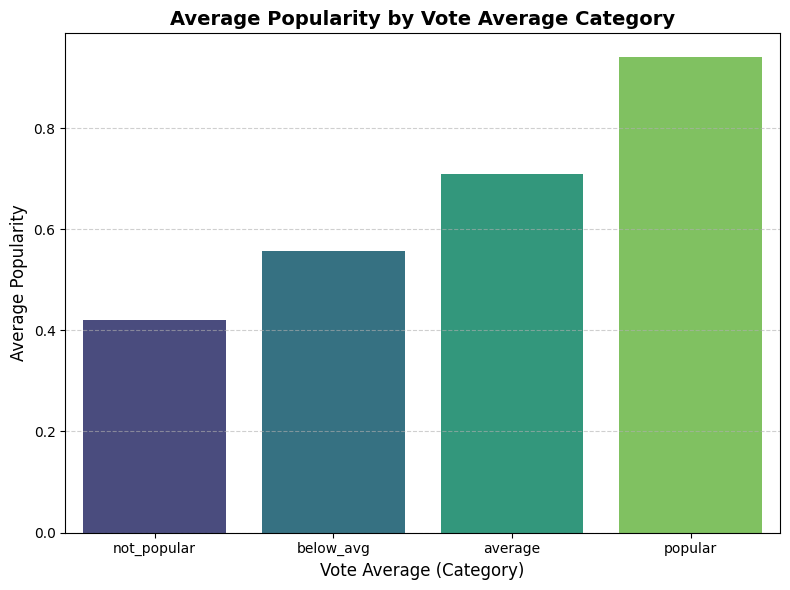

In [119]:
# Calculate mean popularity for each vote_average category
popularity_by_vote_avg = df.groupby('vote_average')['popularity'].mean().reset_index()

# Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    x='vote_average', y='popularity',
    data=popularity_by_vote_avg, palette='viridis'
)

# Enhancing the plot
plt.title('Average Popularity by Vote Average Category', fontsize=14, fontweight='bold')
plt.xlabel('Vote Average (Category)', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

Can conclude by saying that highly voted(rated) movies have high popularity.

###*Which genres have the highest average popularity?*
    * Investigating which movie genres consistently rank high in popularity.
    

<ipython-input-120-a6a23ccda1d8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


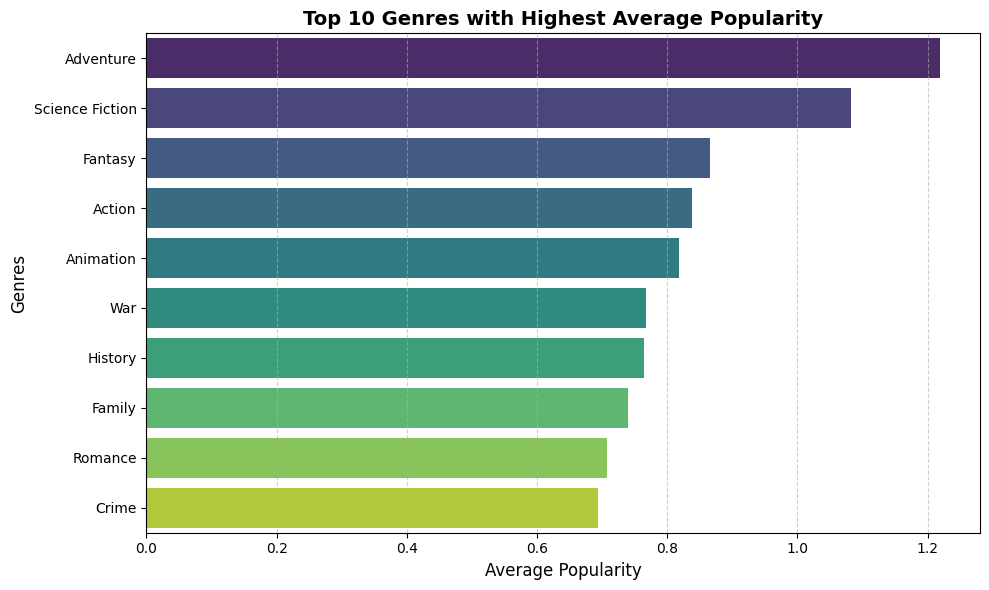

In [120]:

# Group by genres and calculate the average popularity
average_popularity_by_genre = df.groupby('genres')['popularity'].mean().sort_values(ascending=False).reset_index()

# Select top N genres (e.g., top 10)
top_n = 10
top_genres = average_popularity_by_genre.head(top_n)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='popularity', y='genres',
    data=top_genres, palette='viridis'
)

# Enhancing the plot
plt.title(f'Top {top_n} Genres with Highest Average Popularity', fontsize=14, fontweight='bold')
plt.xlabel('Average Popularity', fontsize=12)
plt.ylabel('Genres', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

* Movie genres (Action, Science Fiction, Fantasy) consistently rank high in popularity.

###*Does the number of votes influence popularity?*
    * Looking at the correlation between vote_count and popularity.
   

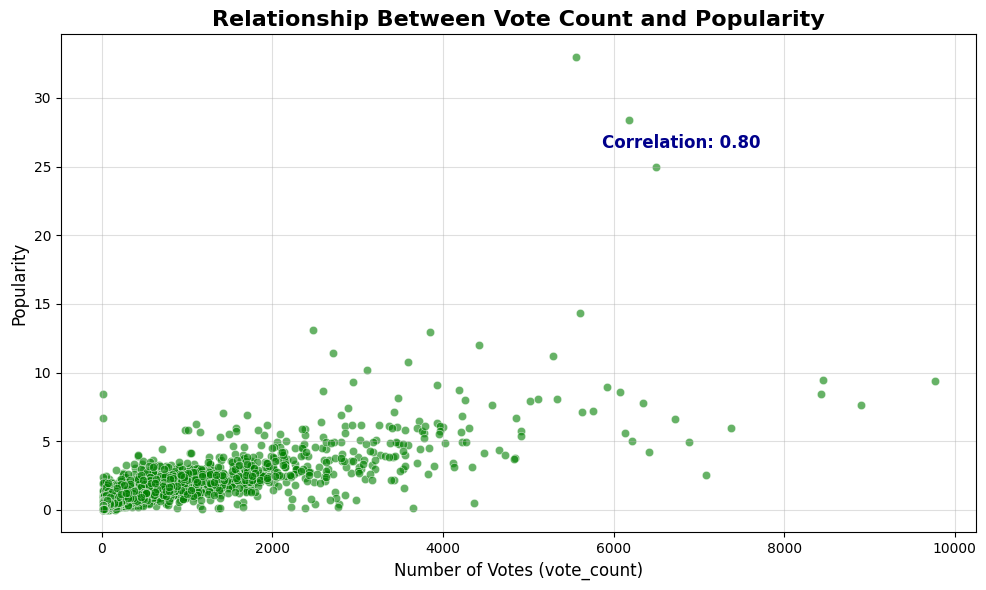

In [121]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_count', y='popularity', data=df, alpha=0.6, color='green')

# Enhancing the plot
plt.title('Relationship Between Vote Count and Popularity', fontsize=16, fontweight='bold')
plt.xlabel('Number of Votes (vote_count)', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, alpha=0.4)

# Calculate and display correlation
correlation = df['vote_count'].corr(df['popularity'])
plt.annotate(
    f"Correlation: {correlation:.2f}",
    xy=(df['vote_count'].max() * 0.6, df['popularity'].max() * 0.8),
    fontsize=12, color='darkblue', fontweight='bold'
)

# Show the plot
plt.tight_layout()
plt.show()

Correlation value (0.80) is positive and close to 1, it means that as the number of votes increases, the popularity tends to increase as well.

Movies with a higher number of votes are more likely to have higher popularity.

##**2. Revenue and Budget Analysis**


###*Which genres generate the most revenue on average?*
    * Breaking down revenue by genres to find which genres are most profitable.
   

<ipython-input-122-76006e610633>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


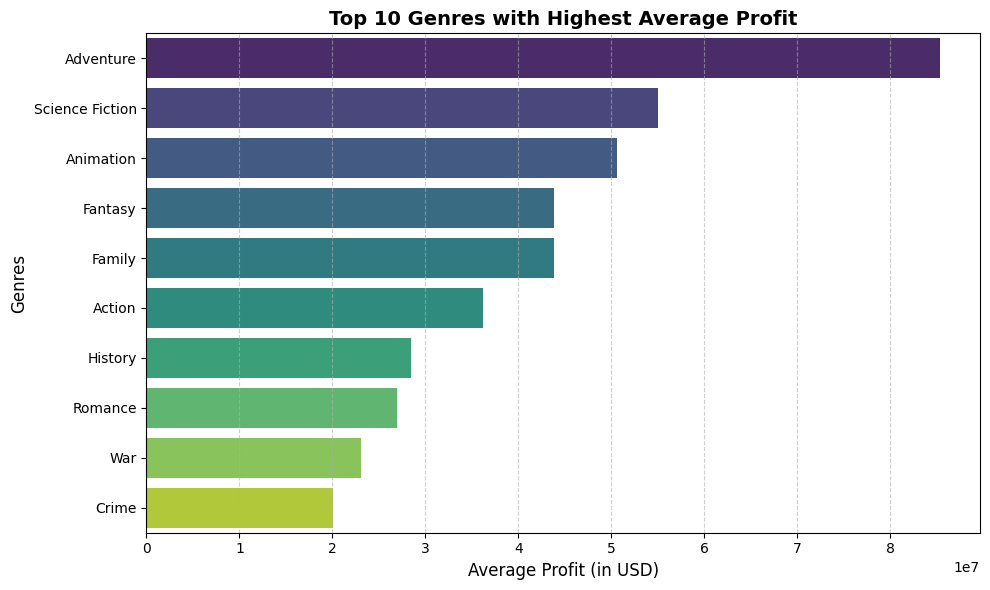

In [122]:
# Recreate profit as a numerical column
df['profit'] = df['revenue'] - df['budget']

# Group by genres and calculate average profit
average_profit_by_genre = df.groupby('genres')['profit'].mean().sort_values(ascending=False).reset_index()

# Select top N genres (e.g., top 10)
top_n = 10
top_genres_profit = average_profit_by_genre.head(top_n)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='profit', y='genres',
    data=top_genres_profit, palette='viridis'
)

# Enhancing the plot
plt.title(f'Top {top_n} Genres with Highest Average Profit', fontsize=14, fontweight='bold')
plt.xlabel('Average Profit (in USD)', fontsize=12)
plt.ylabel('Genres', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

Adventure, Science Ficction, Fantasy movie genres tend to be the most financially successful.

###*What is the average return on investment (ROI) for each genre?*
    * Using the formula ROI = (revenue - budget) / budget and analyze by genres.


<ipython-input-123-70767bd12b4f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roi'] = (df['revenue'] - df['budget']) / df['budget']
<ipython-input-123-70767bd12b4f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


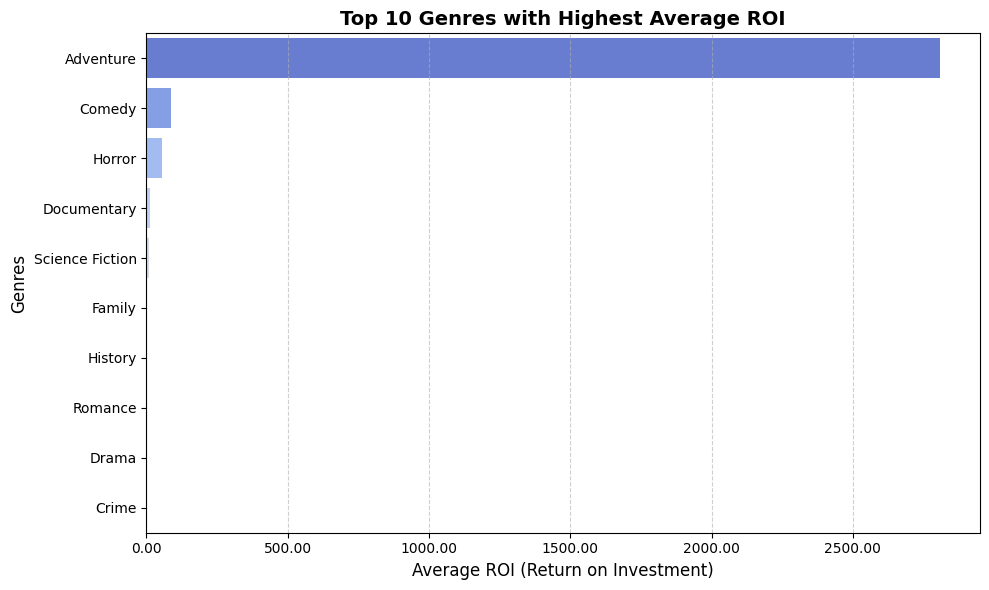

In [123]:

# Handle zero or missing budgets to avoid division by zero
df = df[df['budget'] > 0]  # Exclude movies with zero budget

# Calculate ROI
df['roi'] = (df['revenue'] - df['budget']) / df['budget']

# Group by genres and calculate average ROI
average_roi_by_genre = df.groupby('genres')['roi'].mean().sort_values(ascending=False).reset_index()

# Select top N genres (e.g., top 10)
top_n = 10
top_genres_roi = average_roi_by_genre.head(top_n)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='roi', y='genres',
    data=top_genres_roi, palette='coolwarm'
)

# Enhancing the plot
plt.title(f'Top {top_n} Genres with Highest Average ROI', fontsize=14, fontweight='bold')
plt.xlabel('Average ROI (Return on Investment)', fontsize=12)
plt.ylabel('Genres', fontsize=12)

# Format x-axis tick labels to 2 decimal places
plt.xticks(fontsize=10)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))

plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

Adventure, Comedy, Horror have the highest ROI

##*Do movies with longer runtimes tend to generate more revenue?*
    * Exploring the relationship between runtime and revenue.


<ipython-input-124-a9d82c04ab92>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['runtime_bin'] = pd.cut(df['runtime'], bins=bins, labels=labels)
<ipython-input-124-a9d82c04ab92>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runtime_revenue = df.groupby('runtime_bin')['revenue'].mean().reset_index()
<ipython-input-124-a9d82c04ab92>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


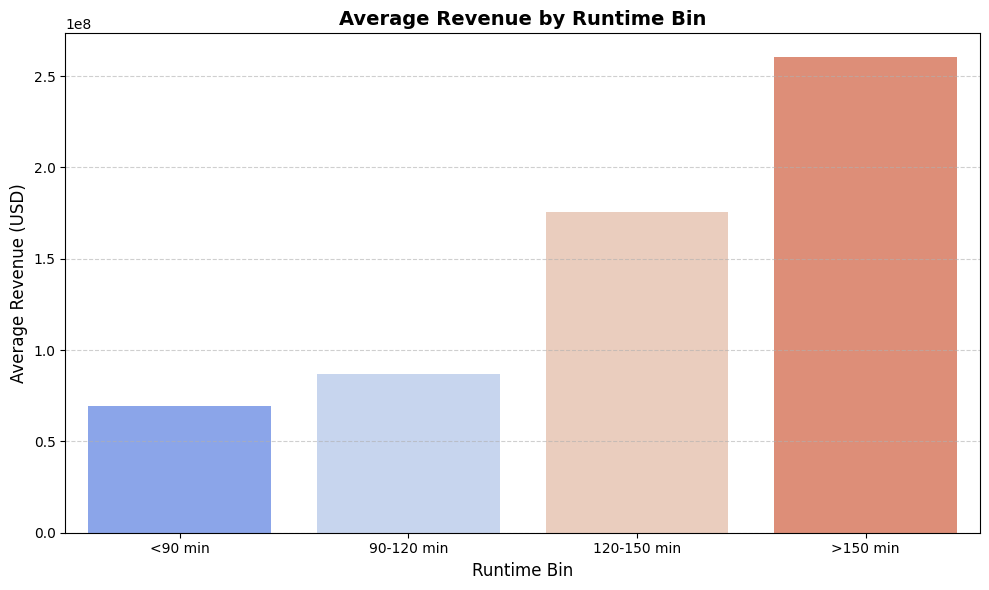

In [124]:
# Exclude movies with missing or zero revenue/runtime
df = df[(df['revenue'] > 0) & (df['runtime'] > 0)]

# Create bins for runtime
bins = [0, 90, 120, 150, 300]
labels = ['<90 min', '90-120 min', '120-150 min', '>150 min']
df['runtime_bin'] = pd.cut(df['runtime'], bins=bins, labels=labels)

# Calculate average revenue for each runtime bin
runtime_revenue = df.groupby('runtime_bin')['revenue'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='runtime_bin', y='revenue', data=runtime_revenue, palette='coolwarm'
)

# Enhancing the plot
plt.title('Average Revenue by Runtime Bin', fontsize=14, fontweight='bold')
plt.xlabel('Runtime Bin', fontsize=12)
plt.ylabel('Average Revenue (USD)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


Movie runtime above 150 min raise more revenue than less than 90 min

##**3. Time-based Analysis**

###*Which years saw the highest number of movie releases?*
    * Analyzing release_year for trends in movie production volume.


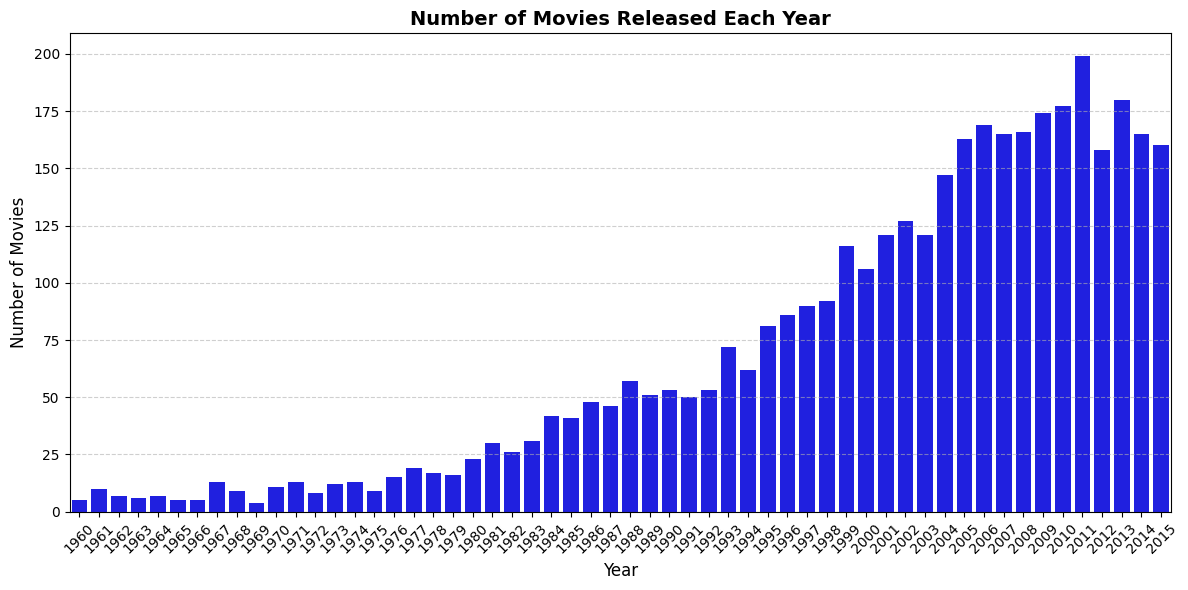

In [125]:
# Count the number of movies released each year
movie_counts_by_year = df['release_year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=movie_counts_by_year.index,
    y=movie_counts_by_year.values,
    color='blue'
)

# Enhancing the plot
plt.title('Number of Movies Released Each Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


2011 year had the highest number of movie releases.




###*How has the average movie budget changed over time?*
    * Examining trends in budget_adj over the years.

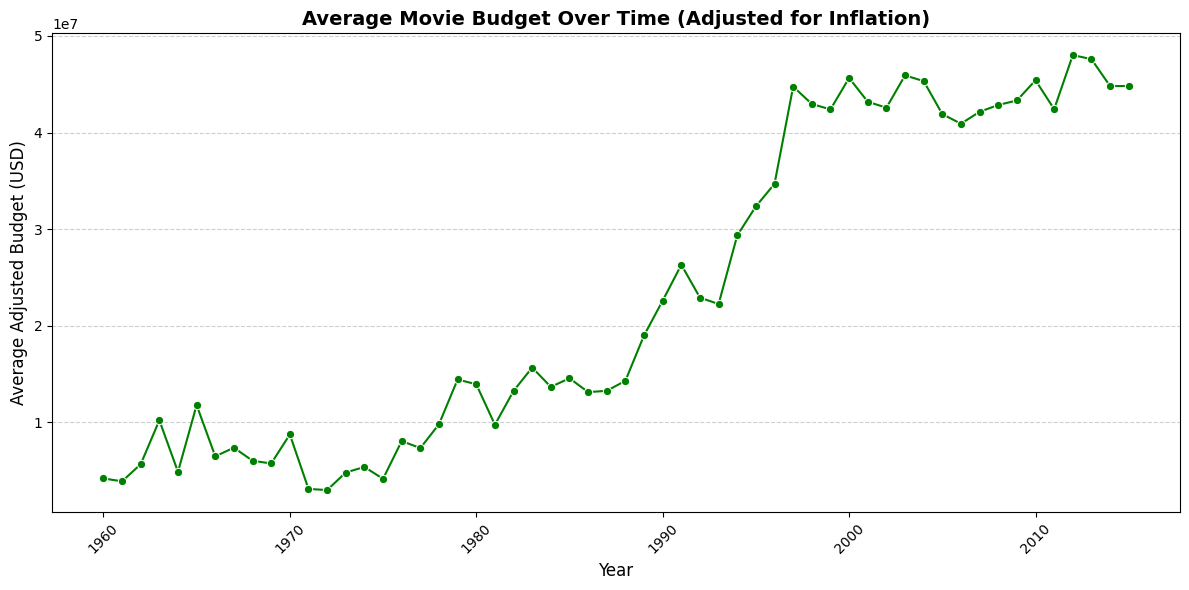

In [126]:
# Exclude movies with zero or missing adjusted budgets
df = df[df['budget'] > 0]

# Calculate average adjusted budget by release year
avg_budget_by_year = df.groupby('release_year')['budget'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='release_year', y='budget',
    data=avg_budget_by_year, marker='o', color='green'
)

# Enhancing the plot
plt.title('Average Movie Budget Over Time (Adjusted for Inflation)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Adjusted Budget (USD)', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

The average movie budget, adjusted for inflation, experienced a peak during the early 1990s to 2000s.

###*Are newer movies generally more popular?*
    * Compare popularity scores across different decades or years.

<ipython-input-127-ea4217d63acd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


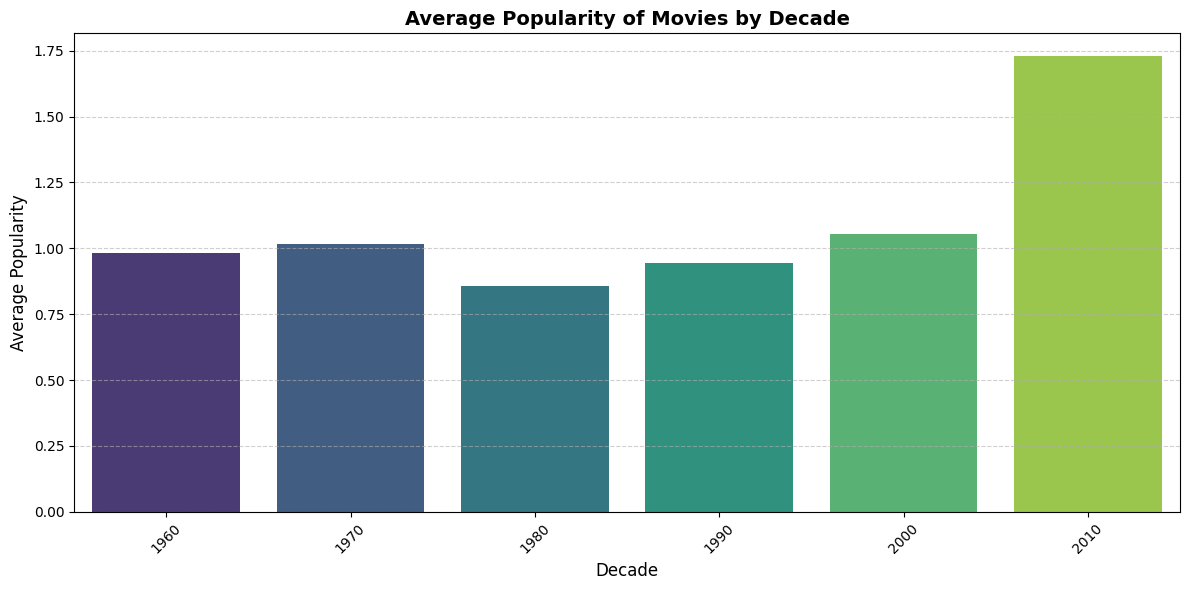

In [127]:
# Create a new column for decade (rounding the year to the nearest decade)
df['decade'] = (df['release_year'] // 10) * 10

# Calculate the average popularity for each decade
popularity_by_decade = df.groupby('decade')['popularity'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='decade', y='popularity',
    data=popularity_by_decade, palette='viridis'
)

# Enhancing the plot
plt.title('Average Popularity of Movies by Decade', fontsize=14, fontweight='bold')
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

The analysis of movie popularity over time reveals an interesting trend. Movies from the 1960s and 1970s generally had higher popularity scores compared to those from the 1980s and 1990s, which saw a decline in popularity. However, there was a noticeable resurgence in popularity starting in the 2000s, with a significant peak in the 2010s.

##**4. User Engagement**


###*Which movies received the highest number of votes?*
    * Rank movies based on vote_count.

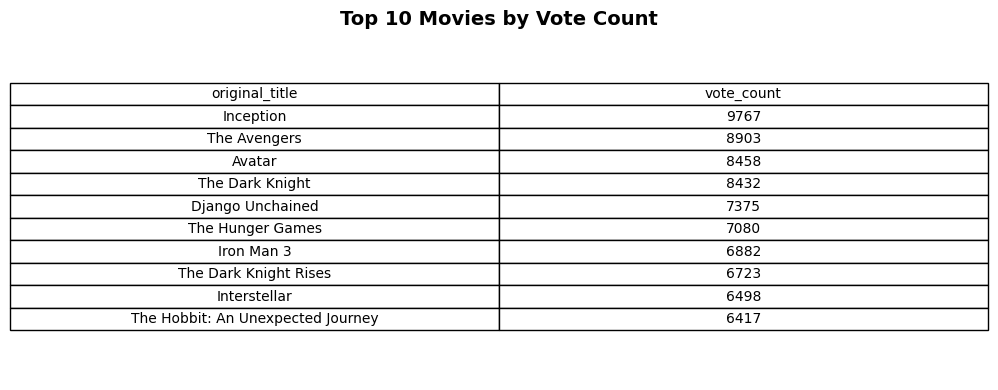

In [128]:
# Sort movies by vote_count in descending order and get top 10 movies
top_voted_movies = df[['original_title', 'vote_count']].sort_values(by='vote_count', ascending=False).head(10)

# Create a figure and axis to plot the table
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the size as needed

# Hide axes
ax.axis('off')

# Create the table
table = ax.table(cellText=top_voted_movies.values, colLabels=top_voted_movies.columns, loc='center', cellLoc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust the scale if necessary

# Title for the table
plt.title('Top 10 Movies by Vote Count', fontsize=14, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

Inception , The Avengers, Avatar recieved the highest number of votes.

###*Do movies with certain directors have better user engagement?*

<ipython-input-133-6c970b555699>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


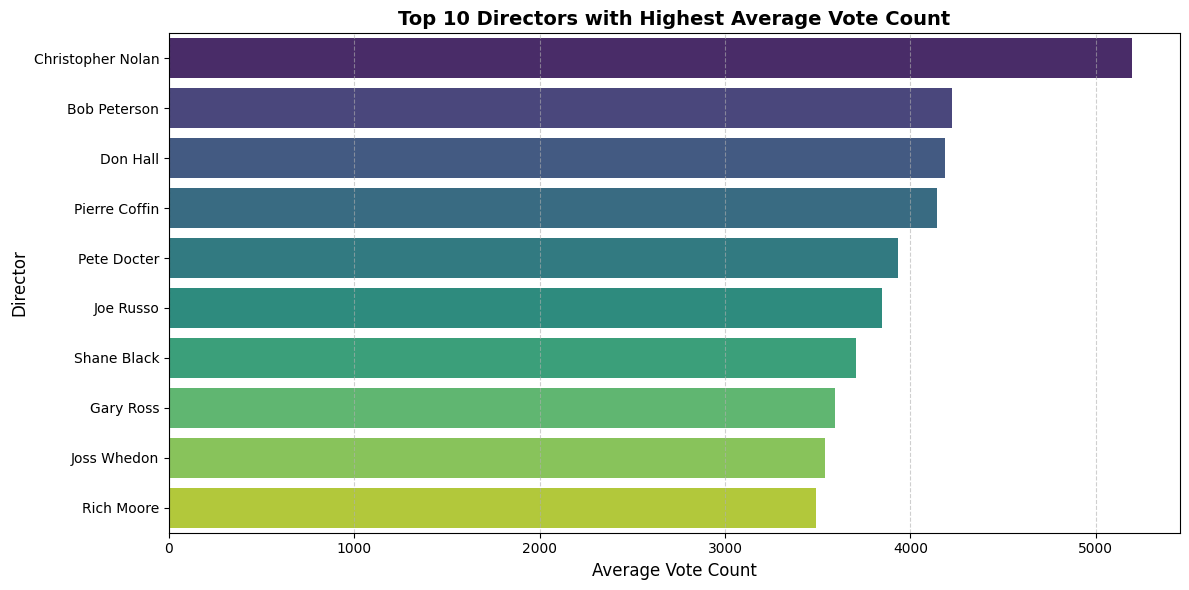

In [133]:
# Group by director and calculate average vote_count
director_vote_count = df.groupby('director')['vote_count'].mean().reset_index()

# Sort by vote_count in descending order and get top 10 directors
top_directors = director_vote_count.sort_values(by='vote_count', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(
    x='vote_count', y='director', data=top_directors, palette='viridis'
)

# Enhancing the plot
plt.title('Top 10 Directors with Highest Average Vote Count', fontsize=14, fontweight='bold')
plt.xlabel('Average Vote Count', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


Christopher Nolan, Bob Peterson to Rich Moore are the directors with highest vote counts.

<a id='conclusions'></a>
## **Conclusions**

##**Popularity and Ratings**


###*1. Do highly rated movies have high popularity?*
> Highly rated movies tend to have higher popularity, indicating a strong positive relationship between ratings and popularity.

###*2. Which genres have the highest average popularity?*
> Action, Science Fiction, and Fantasy are the genres that consistently achieve the highest average popularity.

###*3. Does the number of votes influence popularity?*
> With a strong positive correlation of 0.80, the data shows that as the number of votes increases, the popularity of a movie also tends to increase.
Movies with a higher number of votes are generally more popular.


##**Revenue and Budget Analysis**

###*1. Which genres generate the most revenue on average?*
> Adventure, Science Fiction, and Fantasy genres are the most financially successful, generating the highest average revenue.

###*2. What is the average return on investment (ROI) for each genre?*
> Adventure, Comedy, and Horror genres exhibit the highest ROI, indicating that these genres deliver the best returns relative to their budgets.

###*3. Do movies with longer runtimes tend to generate more revenue?*
> Movies with runtimes over 150 minutes tend to generate significantly higher revenue compared to movies with runtimes under 90 minutes.


##**Time-based Analysis**

###*1. Which years saw the highest number of movie releases?*
> The year 2011 saw the highest number of movie releases, marking it as the peak year in terms of production volume.

###*2. How has the average movie budget changed over time?*
> The average movie budget, when adjusted for inflation, peaked during the early 1990s to 2000s, reflecting a significant increase in movie production costs during that period.

###*3. Are newer movies generally more popular?*
> The popularity of movies over time shows a distinct trend: movies from the 1960s and 1970s had higher popularity scores, while the 1980s and 1990s saw a decline. However, the 2000s marked a resurgence in popularity, with a notable peak in the 2010s, indicating a revival of interest in films during that decade.


##**User Engagement**

###*1. Which movies received the highest number of votes?*
> Inception, The Avengers, and Avatar received the highest number of votes, reflecting their widespread popularity and audience engagement.

###*2. Do movies with certain directors have better user engagement?*
> Directors like Christopher Nolan, Bob Peterson, and Rich Moore are associated with the highest vote counts, indicating that their movies tend to generate more user engagement.
   

___